In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name='data')

In [ ]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

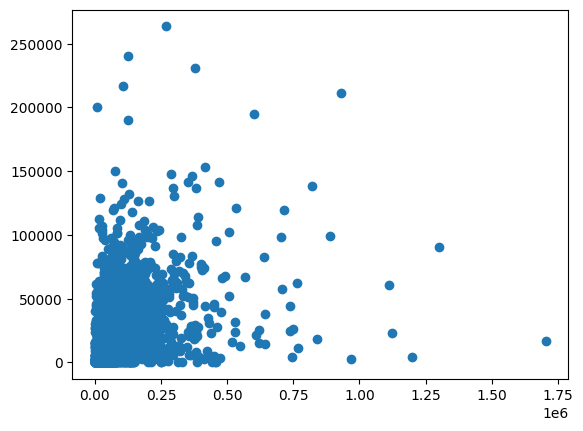

In [ ]:
plt.scatter(df["Balance"],df["Bonus_miles"])

In [ ]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [ ]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [ ]:
df.value_counts()

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?
4021  3016     0           1          1          1          0            0            0                  0                1398               0         1
1     28143    0           1          1          1          174          1            0                  0                7000               0         1
2     19244    0           1          1          1          215          2            0                  0                6968               0         1
3     41354    0           1          1          1          4123         4            0                  0                7034               0         1
4     14776    0           1          1          1          500          1            0                  0                6952               0         1
                                                                                                                                                      ..
20    23354    0           3          1          1          10447        5            0                  0                6896               1         1
19    91473    0           3          1          1          27408        17           0                  0                6903               1         1
18    13958    0           1          1          1          4291         5            0                  0                6905               1         1
17    51890    0           4          1          1          48963        16           0                  0                6910               1         1
16    28495    0           4          1          1          49442        15           0                  0                6912               1         1
Name: count, Length: 3999, dtype: int64

In [ ]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

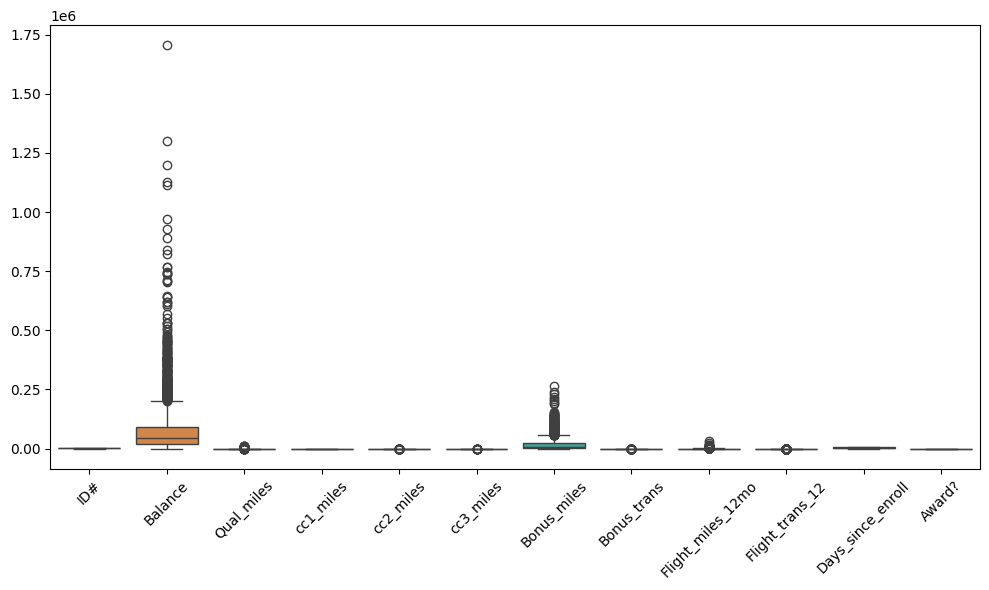

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x )
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

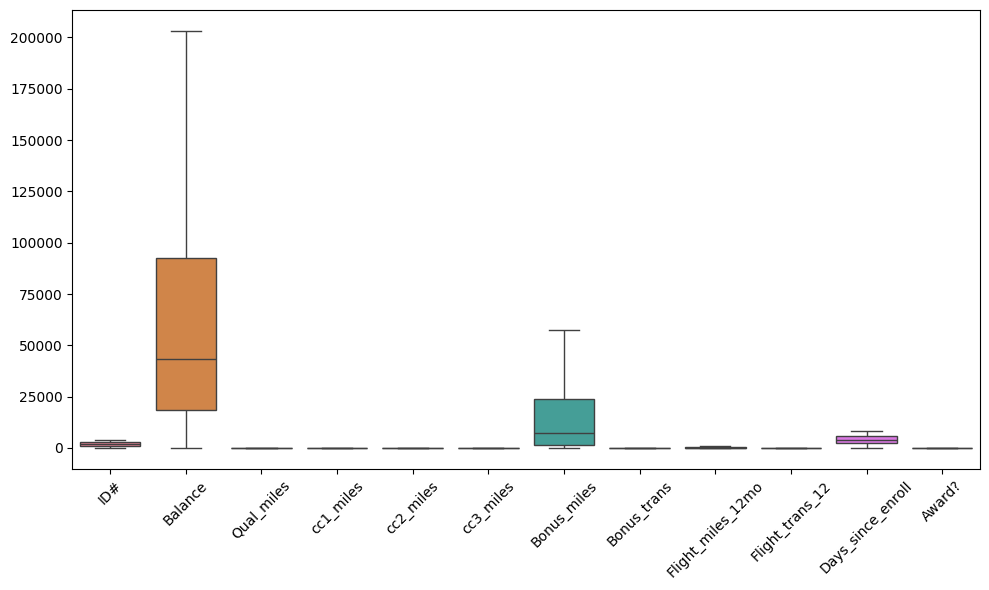

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
num_cols=[i for i in df.columns if df[i].dtypes!="O"]

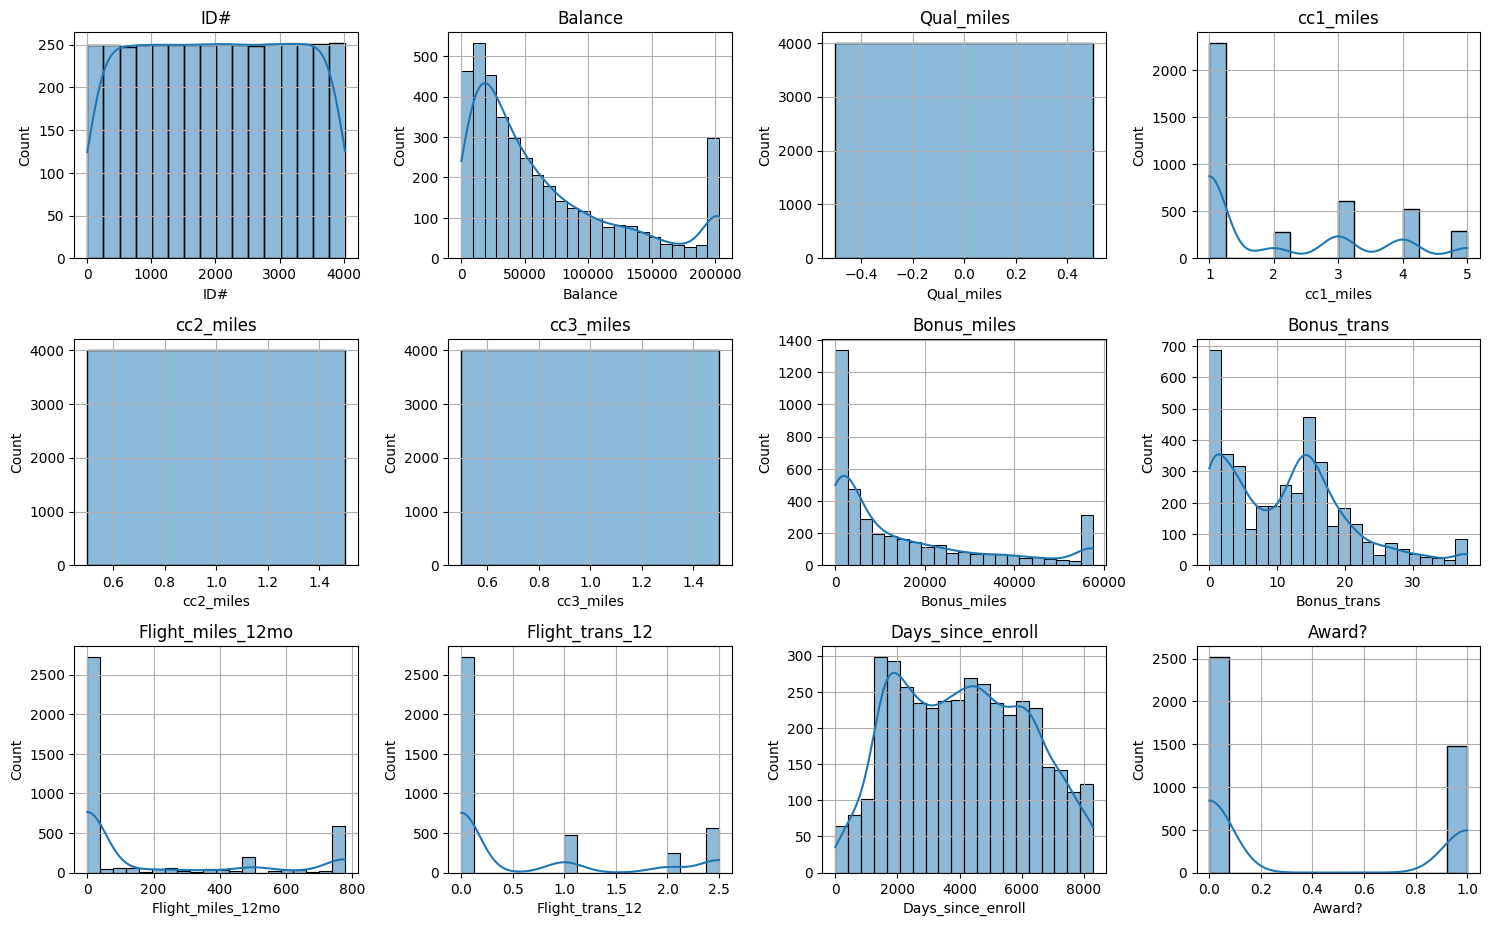

In [ ]:
# Histograms
plt.figure(figsize=(15, 12))

for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.grid(True)
    plt.title(column)

plt.tight_layout()
plt.show()

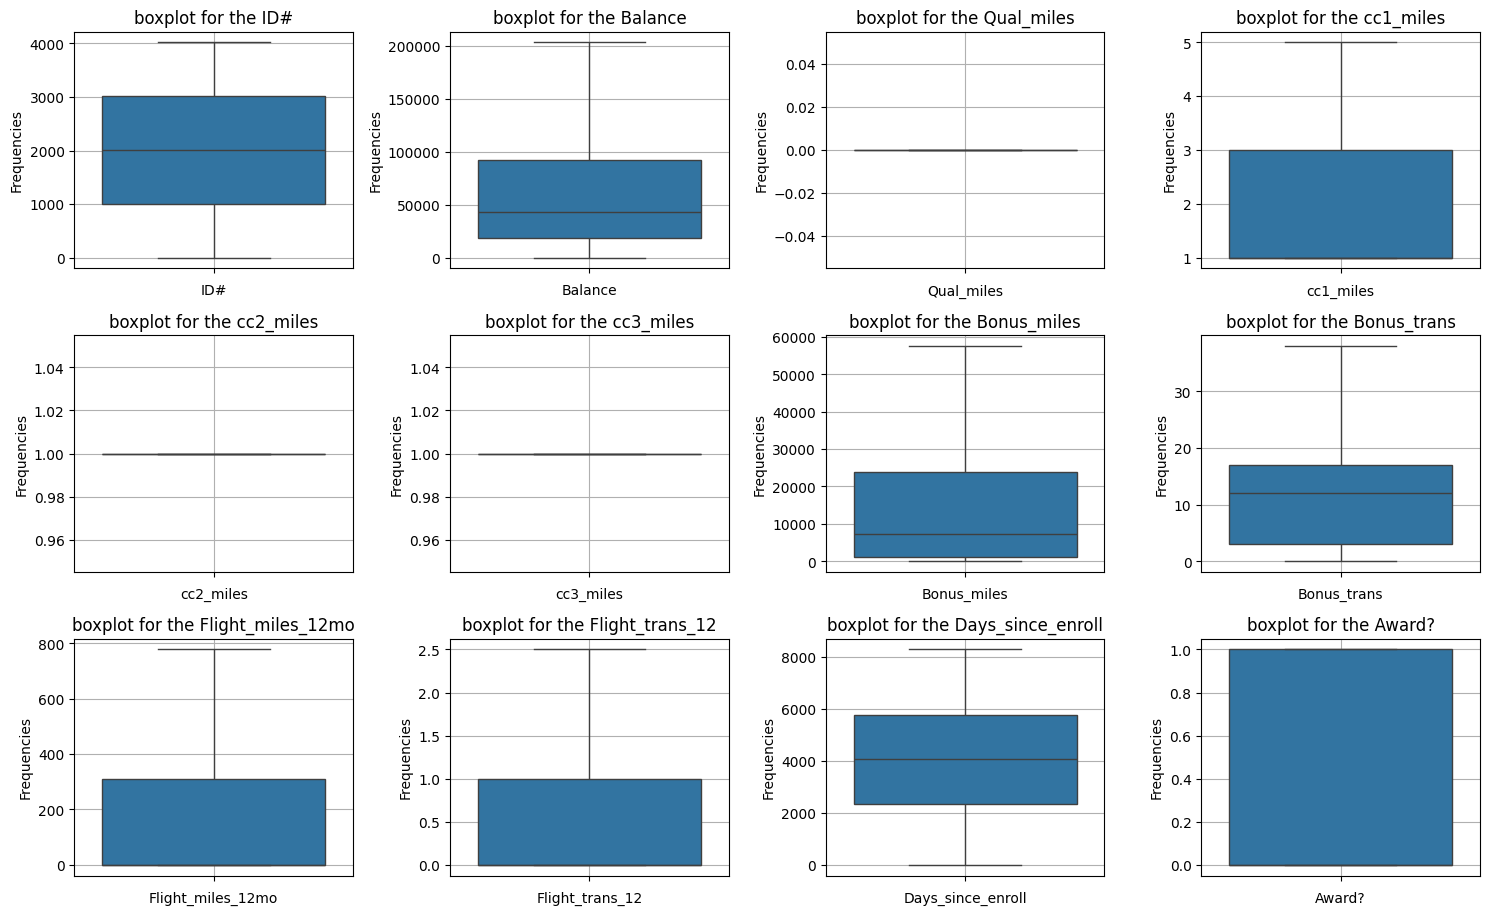

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)   # adjust rows/cols based on number of features
    sns.boxplot(y=df[col])  # y=col for vertical boxplot
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"boxplot for the {col}")
    plt.grid(True)

plt.tight_layout()
plt.show()

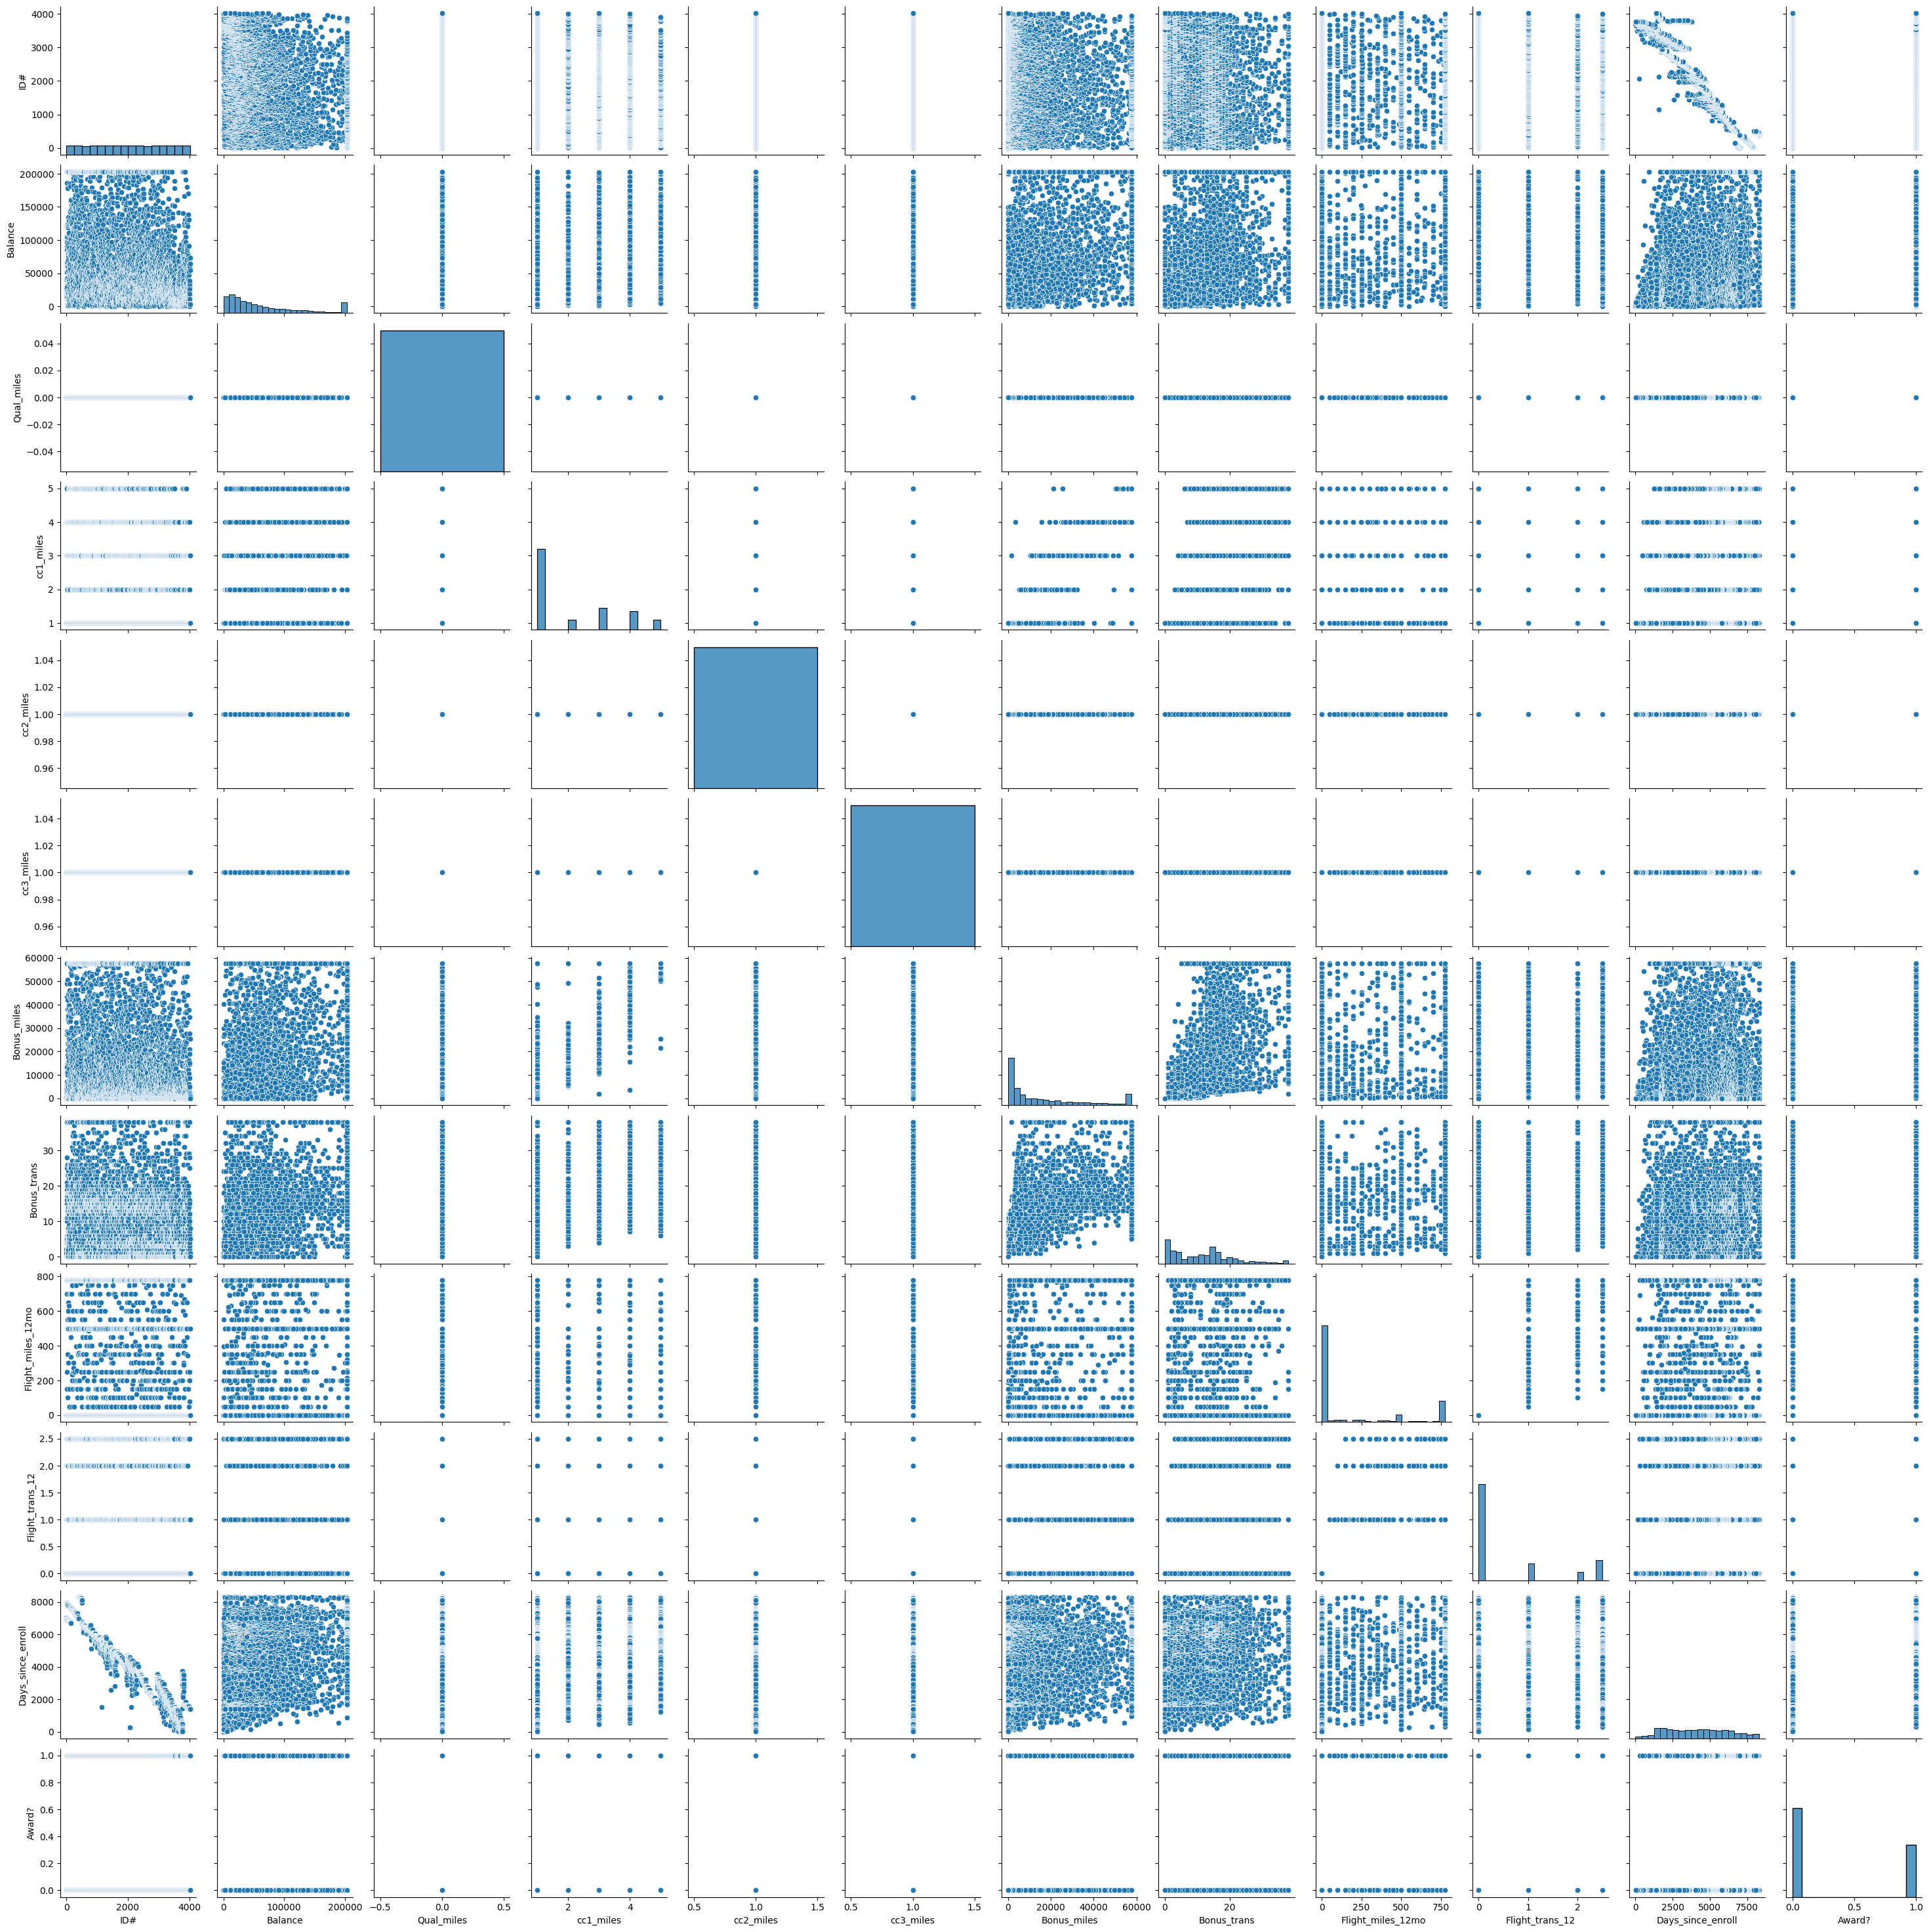

In [ ]:
sns.pairplot(df)

In [ ]:
cor=df.corr()

In [ ]:
cor

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
ID#                1.000000 -0.269374         NaN  -0.224465        NaN   
Balance           -0.269374  1.000000         NaN   0.446510        NaN   
Qual_miles              NaN       NaN         NaN        NaN        NaN   
cc1_miles         -0.224465  0.446510         NaN   1.000000        NaN   
cc2_miles               NaN       NaN         NaN        NaN        NaN   
cc3_miles               NaN       NaN         NaN        NaN        NaN   
Bonus_miles       -0.210868  0.494422         NaN   0.912531        NaN   
Bonus_trans       -0.156118  0.409017         NaN   0.627786        NaN   
Flight_miles_12mo -0.083917  0.297045         NaN   0.098786        NaN   
Flight_trans_12   -0.082887  0.295565         NaN   0.087618        NaN   
Days_since_enroll -0.964988  0.286143         NaN   0.230849        NaN   
Award?            -0.177901  0.170678         NaN   0.335457        NaN   

                   cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
ID#                      NaN    -0.210868    -0.156118          -0.083917   
Balance                  NaN     0.494422     0.409017           0.297045   
Qual_miles               NaN          NaN          NaN                NaN   
cc1_miles                NaN     0.912531     0.627786           0.098786   
cc2_miles                NaN          NaN          NaN                NaN   
cc3_miles                NaN          NaN          NaN                NaN   
Bonus_miles              NaN     1.000000     0.663558           0.205801   
Bonus_trans              NaN     0.663558     1.000000           0.310543   
Flight_miles_12mo        NaN     0.205801     0.310543           1.000000   
Flight_trans_12          NaN     0.193669     0.308518           0.942734   
Days_since_enroll        NaN     0.217320     0.170308           0.095019   
Award?                   NaN     0.394061     0.337444           0.293119   

                   Flight_trans_12  Days_since_enroll    Award?  
ID#                      -0.082887          -0.964988 -0.177901  
Balance                   0.295565           0.286143  0.170678  
Qual_miles                     NaN                NaN       NaN  
cc1_miles                 0.087618           0.230849  0.335457  
cc2_miles                      NaN                NaN       NaN  
cc3_miles                      NaN                NaN       NaN  
Bonus_miles               0.193669           0.217320  0.394061  
Bonus_trans               0.308518           0.170308  0.337444  
Flight_miles_12mo         0.942734           0.095019  0.293119  
Flight_trans_12           1.000000           0.091898  0.300085  
Days_since_enroll         0.091898           1.000000  0.188121  
Award?                    0.300085           0.188121  1.000000

<Axes: >

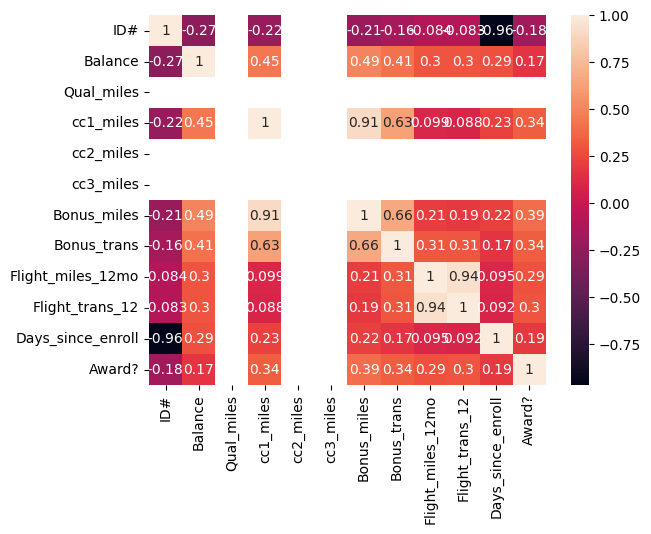

In [ ]:
sns.heatmap(cor,annot=True)

In [ ]:
features=pd.DataFrame(df.drop(columns="ID#"))

In [ ]:
features

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     28143.0         0.0          1        1.0        1.0        174.0   
1     19244.0         0.0          1        1.0        1.0        215.0   
2     41354.0         0.0          1        1.0        1.0       4123.0   
3     14776.0         0.0          1        1.0        1.0        500.0   
4     97752.0         0.0          4        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
3994  18476.0         0.0          1        1.0        1.0       8525.0   
3995  64385.0         0.0          1        1.0        1.0        981.0   
3996  73597.0         0.0          3        1.0        1.0      25447.0   
3997  54899.0         0.0          1        1.0        1.0        500.0   
3998   3016.0         0.0          1        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0               7000   
1             2.0                0.0              0.0               6968   
2             4.0                0.0              0.0               7034   
3             1.0                0.0              0.0               6952   
4            26.0              777.5              2.5               6935   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   
3997          1.0              500.0              1.0               1401   
3998          0.0                0.0              0.0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [ ]:
fea_scales=StandardScaler()

In [ ]:
featss=pd.DataFrame(fea_scales.fit_transform(features))

In [ ]:
featss

0    1         2    3    4         5         6         7   \
0    -0.607258  0.0 -0.769578  0.0  0.0 -0.843091 -1.148854 -0.604313   
1    -0.758947  0.0 -0.769578  0.0  0.0 -0.840822 -1.039133 -0.604313   
2    -0.382070  0.0 -0.769578  0.0  0.0 -0.624581 -0.819689 -0.604313   
3    -0.835106  0.0 -0.769578  0.0  0.0 -0.825052 -1.148854 -0.604313   
4     0.579265  0.0  1.409471  0.0  0.0  1.543191  1.594189  2.034489   
...        ...  ...       ...  ...  ...       ...       ...       ...   
3994 -0.772038  0.0 -0.769578  0.0  0.0 -0.381007 -0.819689  0.074478   
3995  0.010506  0.0 -0.769578  0.0  0.0 -0.798437 -0.709967 -0.604313   
3996  0.167530  0.0  0.683121  0.0  0.0  0.555335 -0.380802 -0.604313   
3997 -0.151188  0.0 -0.769578  0.0  0.0 -0.825052 -1.148854  1.092666   
3998 -1.035562  0.0 -0.769578  0.0  0.0 -0.852718 -1.258576 -0.604313   

            8         9         10  
0    -0.626143  1.395454 -0.766919  
1    -0.626143  1.379957 -0.766919  
2    -0.626143  1.411920 -0.766919  
3    -0.626143  1.372208 -0.766919  
4     2.020176  1.363975  1.303918  
...        ...       ...       ...  
3994  0.432384 -1.315120  1.303918  
3995 -0.626143 -1.318994  1.303918  
3996 -0.626143 -1.315604  1.303918  
3997  0.432384 -1.316088 -0.766919  
3998 -0.626143 -1.317541 -0.766919  

[3999 rows x 11 columns]

In [ ]:
dbscan=DBSCAN(eps=2.0,min_samples=10,metric="euclidean")

In [ ]:
dbscan

DBSCAN(eps=2.0, min_samples=10)

In [ ]:
clusters=dbscan.fit_predict(featss)

In [ ]:
clusters

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
df["clusters"]= clusters

In [ ]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1  28143.0         0.0          1        1.0        1.0        174.0   
1        2  19244.0         0.0          1        1.0        1.0        215.0   
2        3  41354.0         0.0          1        1.0        1.0       4123.0   
3        4  14776.0         0.0          1        1.0        1.0        500.0   
4        5  97752.0         0.0          4        1.0        1.0      43300.0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017  18476.0         0.0          1        1.0        1.0       8525.0   
3995  4018  64385.0         0.0          1        1.0        1.0        981.0   
3996  4019  73597.0         0.0          3        1.0        1.0      25447.0   
3997  4020  54899.0         0.0          1        1.0        1.0        500.0   
3998  4021   3016.0         0.0          1        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0               7000   
1             2.0                0.0              0.0               6968   
2             4.0                0.0              0.0               7034   
3             1.0                0.0              0.0               6952   
4            26.0              777.5              2.5               6935   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   
3997          1.0              500.0              1.0               1401   
3998          0.0                0.0              0.0               1398   

      Award?  clusters  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          1         1  
...      ...       ...  
3994       1         1  
3995       1         1  
3996       1         1  
3997       0         0  
3998       0         0  

[3999 rows x 13 columns]

In [ ]:
n_clusters=len(set(clusters))-(1 if -1 in clusters else 0)

In [ ]:
n_clusters

2

In [ ]:
n_noise=list(clusters).count(-1)

In [ ]:
n_noise

1

In [ ]:
if n_clusters>1:
    sil_scores_db=silhouette_score(featss,clusters)

In [ ]:
sil_scores_db

np.float64(0.21420688840410834)

In [ ]:
scores = []
ran = np.arange(1.0, 3.0, 0.2)

for k in ran:
    dbscan = DBSCAN(eps=k, min_samples=10, metric="euclidean")
    labels = dbscan.fit_predict(featss)

    # unique clusters except noise
    unique_clusters = set(labels) - {-1}

    # silhouette works only if 2 or more clusters exist
    if len(unique_clusters) >= 2:
        si = silhouette_score(featss, labels)
        scores.append(si)
        print(f"eps = {k}, silhouette = {si:.4f}")
    else:
        scores.append(None)
        print(f"eps = {k}, silhouette = Not valid (only {len(unique_clusters)} cluster(s))")

eps = 1.0, silhouette = -0.0366
eps = 1.2, silhouette = 0.1818
eps = 1.4, silhouette = 0.1601
eps = 1.5999999999999999, silhouette = 0.2092
eps = 1.7999999999999998, silhouette = 0.2144
eps = 1.9999999999999998, silhouette = 0.2142
eps = 2.1999999999999997, silhouette = Not valid (only 1 cluster(s))
eps = 2.3999999999999995, silhouette = Not valid (only 1 cluster(s))
eps = 2.5999999999999996, silhouette = Not valid (only 1 cluster(s))
eps = 2.8, silhouette = Not valid (only 1 cluster(s))


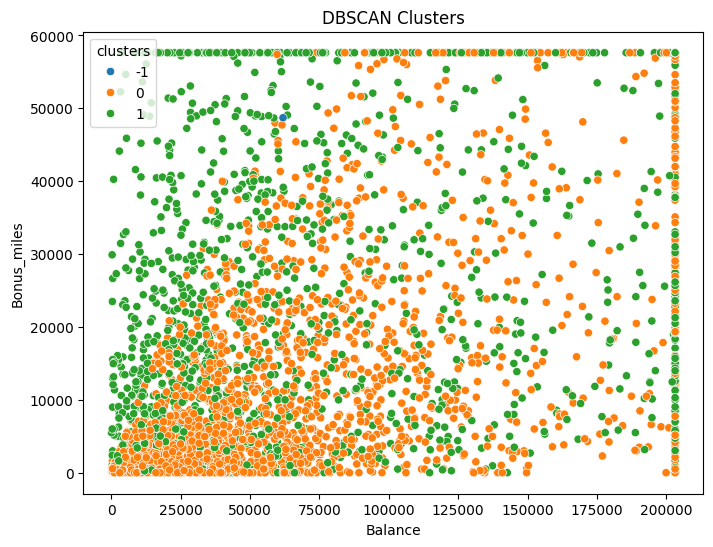

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()


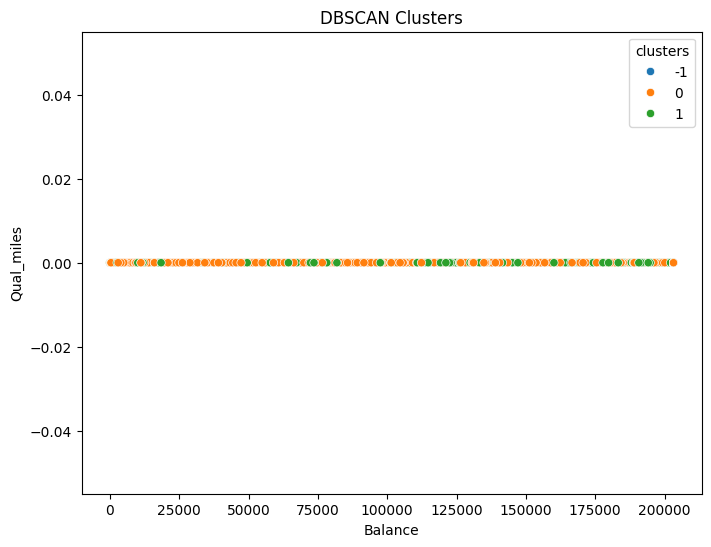

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Qual_miles'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()


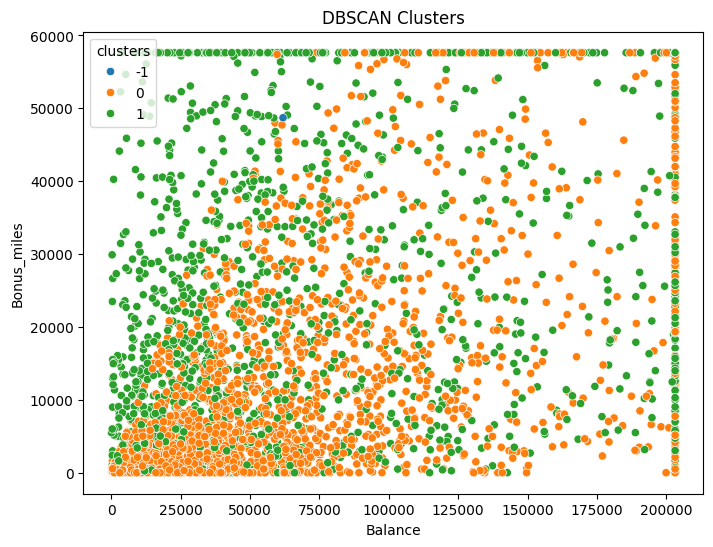

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()


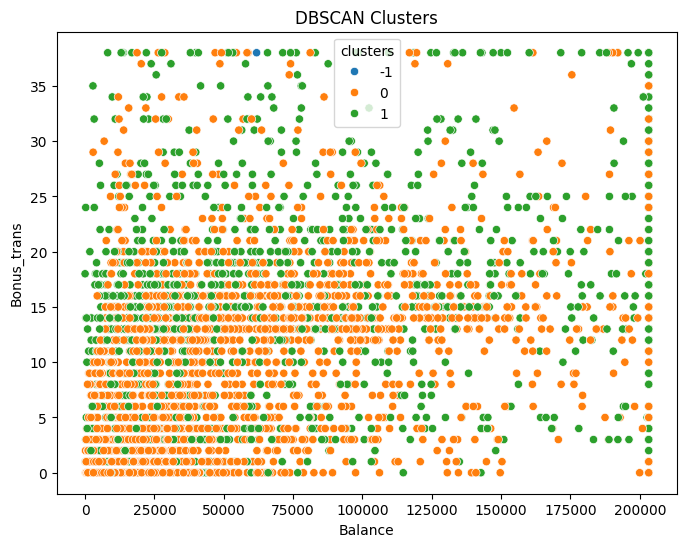

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_trans'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

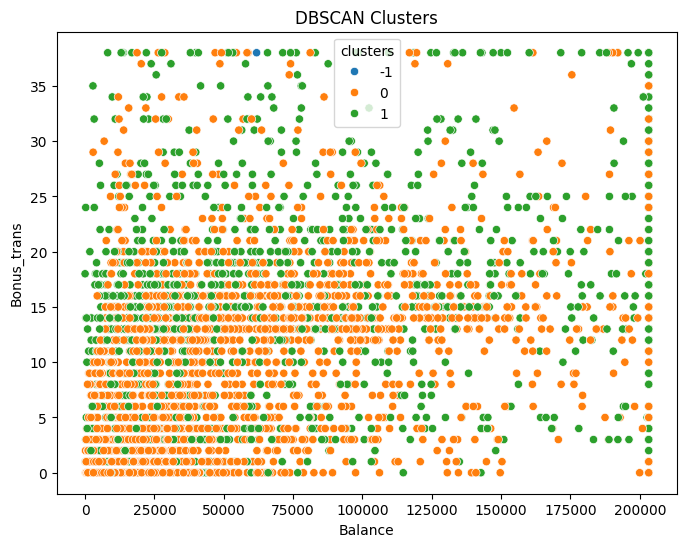

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_trans'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

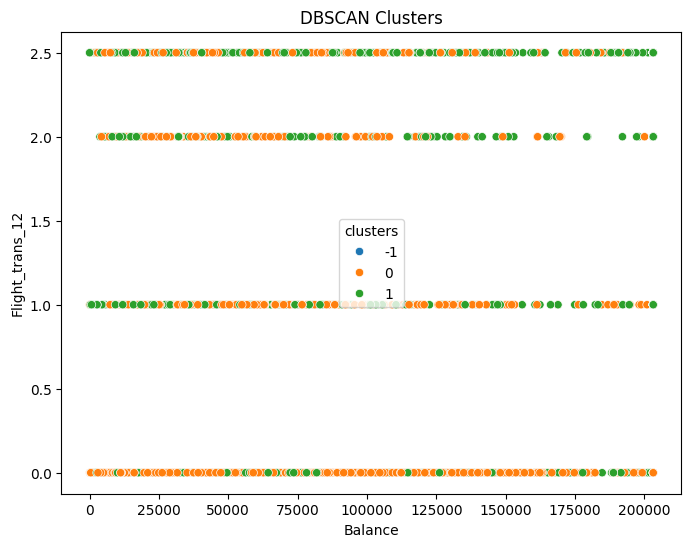

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Flight_trans_12'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

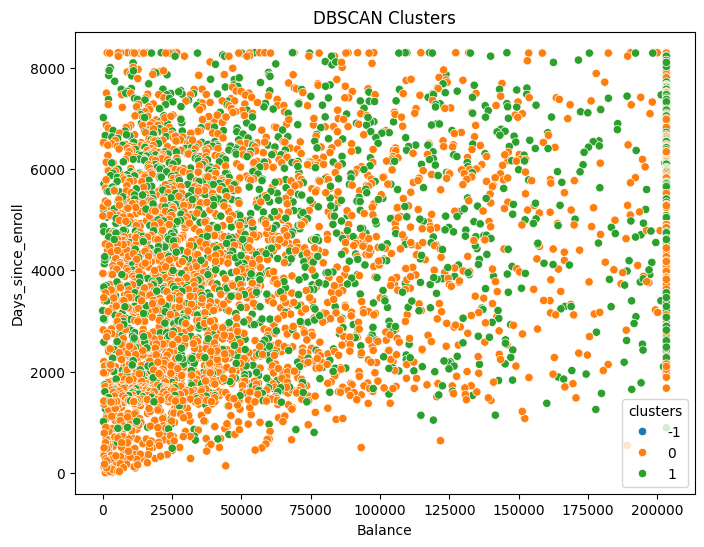

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Days_since_enroll'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

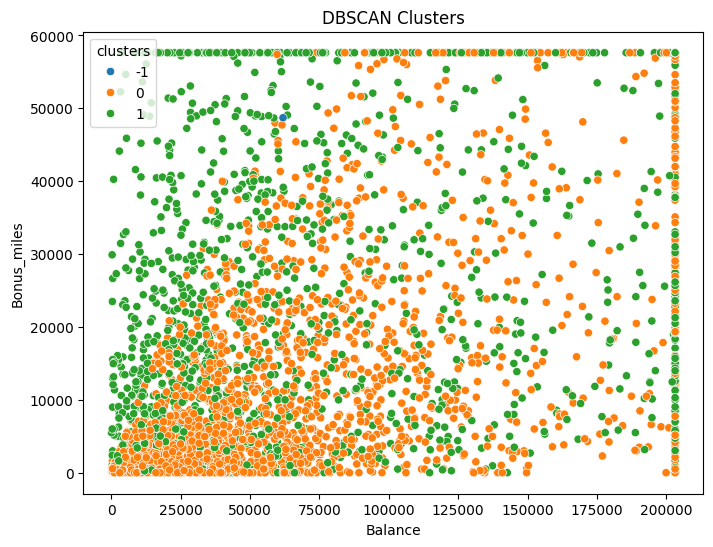

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusters'], palette='tab10')
plt.title("DBSCAN Clusters")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42)
clusterss=kmeans.fit(featss)

In [ ]:
np.unique(clusterss.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [ ]:
sil_scores_kn=silhouette_score(featss,clusterss.labels_)

In [ ]:
sil_scores_kn

np.float64(0.25262479213708916)

In [ ]:
df["clusterss"]=clusterss.labels_

In [ ]:
df[df.clusters==3]

Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?, clusters, clusterss]
Index: []

In [ ]:
#elbow curves for chosing k clusters
scores=[]
ran=range(2,12)
for k in ran:
    kmeans=KMeans(n_clusters=k,random_state=50)
    labels=kmeans.fit_predict(featss)
    si_scores=silhouette_score(featss,labels)
    scores.append(si_scores)
    print(f"k = {k} ,silhouette = {si_scores:.4f}")



k = 2 ,silhouette = 0.3182
k = 3 ,silhouette = 0.3087
k = 4 ,silhouette = 0.3072
k = 5 ,silhouette = 0.2955
k = 6 ,silhouette = 0.2415
k = 7 ,silhouette = 0.2494
k = 8 ,silhouette = 0.2461
k = 9 ,silhouette = 0.2480
k = 10 ,silhouette = 0.2584
k = 11 ,silhouette = 0.2543


In [ ]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1  28143.0         0.0          1        1.0        1.0        174.0   
1        2  19244.0         0.0          1        1.0        1.0        215.0   
2        3  41354.0         0.0          1        1.0        1.0       4123.0   
3        4  14776.0         0.0          1        1.0        1.0        500.0   
4        5  97752.0         0.0          4        1.0        1.0      43300.0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017  18476.0         0.0          1        1.0        1.0       8525.0   
3995  4018  64385.0         0.0          1        1.0        1.0        981.0   
3996  4019  73597.0         0.0          3        1.0        1.0      25447.0   
3997  4020  54899.0         0.0          1        1.0        1.0        500.0   
3998  4021   3016.0         0.0          1        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0               7000   
1             2.0                0.0              0.0               6968   
2             4.0                0.0              0.0               7034   
3             1.0                0.0              0.0               6952   
4            26.0              777.5              2.5               6935   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0               1403   
3995          5.0                0.0              0.0               1395   
3996          8.0                0.0              0.0               1402   
3997          1.0              500.0              1.0               1401   
3998          0.0                0.0              0.0               1398   

      Award?  clusters  clusterss  
0          0         0          5  
1          0         0          5  
2          0         0          5  
3          0         0          5  
4          1         1          4  
...      ...       ...        ...  
3994       1         1          3  
3995       1         1          3  
3996       1         1          3  
3997       0         0         10  
3998       0         0          2  

[3999 rows x 14 columns]

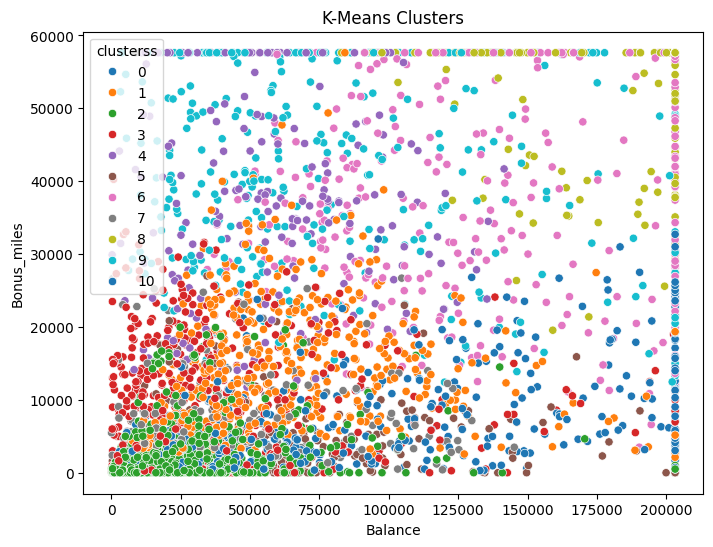

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


In [ ]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'clusters', 'clusterss'],
      dtype='object')

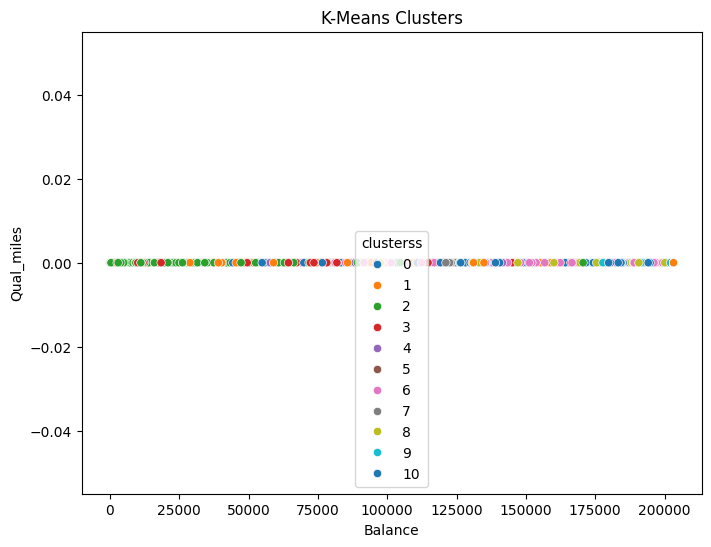

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Qual_miles'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


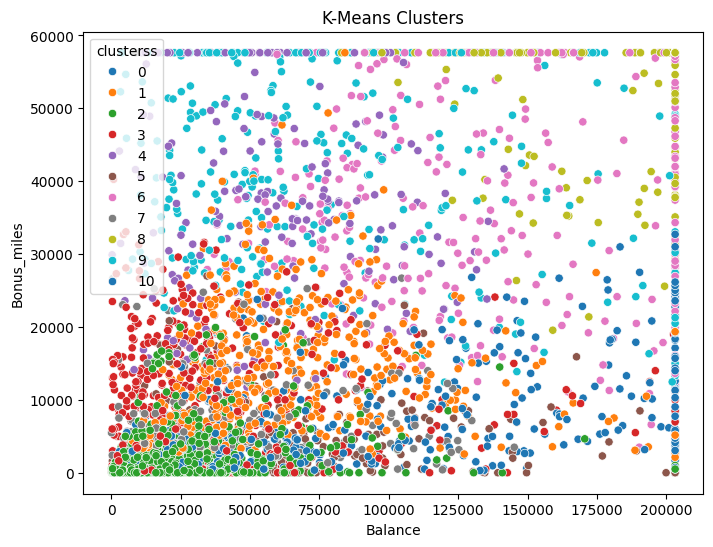

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


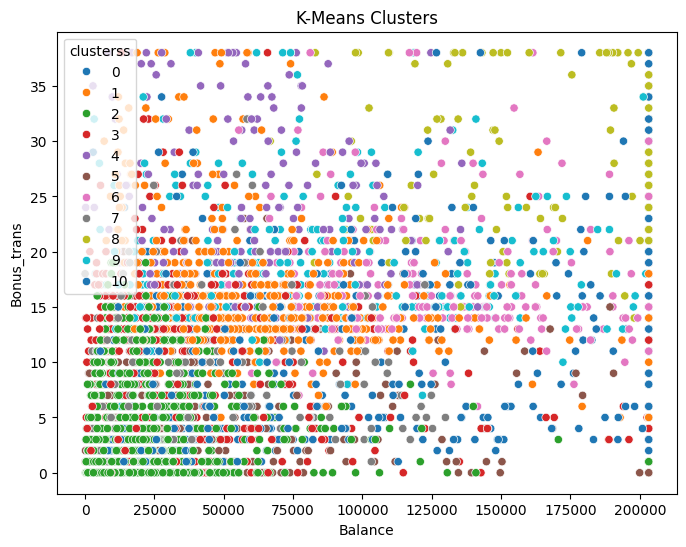

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_trans'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


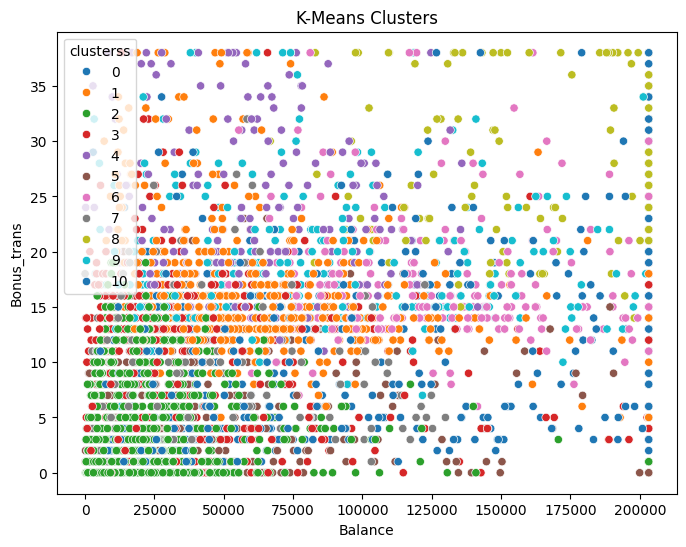

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_trans'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


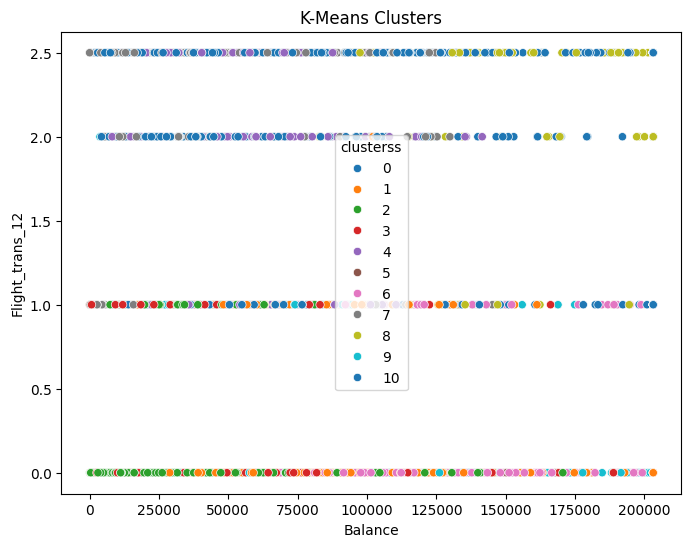

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Flight_trans_12'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


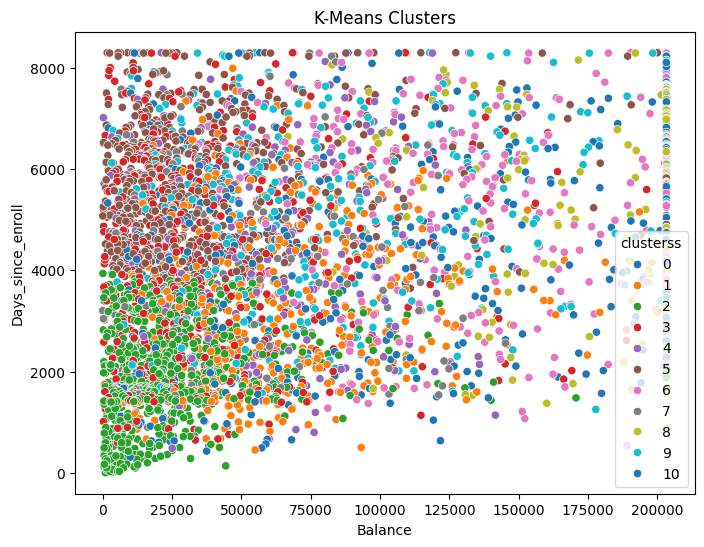

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Days_since_enroll'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()


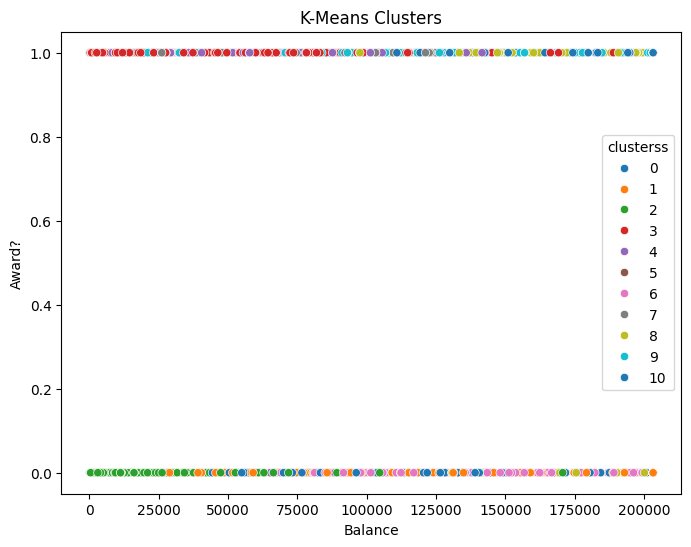

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Balance'], y=df['Award?'], hue=df['clusterss'], palette='tab10')
plt.title("K-Means Clusters")
plt.show()
